### Importation des bibliothèques

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , Dropout , BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint, CSVLogger

import tensorflow as tf

import pickle

from sklearn.metrics import classification_report,confusion_matrix

### Normalisation des données

In [2]:
datagen = ImageDataGenerator(rescale = 1./255)

Création d'un générateur d'images qui normalise les valeurs des pixels en les divisant par 255, les convertissant ainsi d'une plage de 0-255 à une plage de 0-1 pour améliorer l'apprentissage du modèle de machine learning.

### Chargement des données

In [4]:
train = datagen.flow_from_directory(r"C:\Users\User\Desktop\PFA\Dataset\train", target_size=(224, 224), class_mode='binary', batch_size=64)
val = datagen.flow_from_directory(r"C:\Users\User\Desktop\PFA\Dataset\val", target_size=(224, 224), class_mode='binary', batch_size=64)
test = datagen.flow_from_directory(r"C:\Users\User\Desktop\PFA\Dataset\test", target_size=(224, 224), class_mode='binary', batch_size=64)

Found 3816 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.


train, val, et test sont des générateurs d'images créés à partir des répertoires spécifiés. Chaque image est redimensionnée à 224x224 pixels et les étiquettes de classes sont binaires.

Les images sont normalisées en divisant les valeurs des pixels par 255 grâce à l'objet datagen.

In [5]:
imgs, labels = next(train)

Cette ligne de code extrait un lot de 64 images (la taille de batch spécifiée) et leurs étiquettes depuis le générateur train.

In [6]:
imgs.shape

(64, 224, 224, 3)

Indique qu'on a 64 images de 224x224 pixels avec 3 canaux de couleur (RGB).

In [6]:
train.class_indices

{'Benign': 0, 'Malignant': 1}

### Visualisation des données

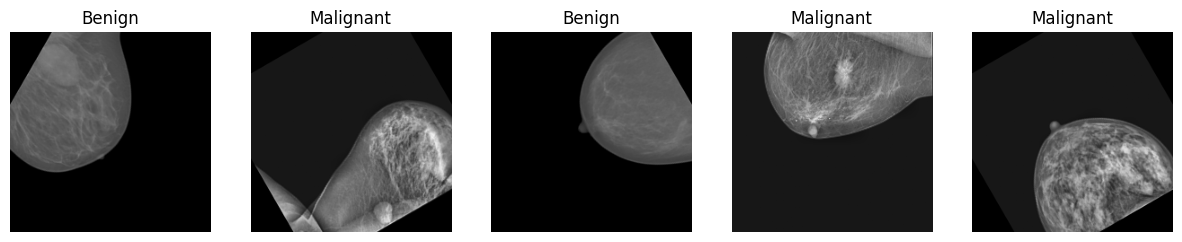

In [10]:
import matplotlib.pyplot as plt

# Get 5 images and labels from the train generator
num_images_to_show = 5
images_to_show, labels_to_show = [], []
for i in range(num_images_to_show):
    image, label = train.next()
    images_to_show.append(image[0])  # We take the first image from each batch
    labels_to_show.append(label[0])   # Corresponding label for the first image

# Map numerical labels to their corresponding class names
class_names = {v: k for k, v in train.class_indices.items()}

# Plot the images with their labels
plt.figure(figsize=(15, 10))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(images_to_show[i])
    plt.title(class_names[int(labels_to_show[i])])  # Convert label to integer and get class name
    plt.axis('off')

plt.show()

# MODELE CNN

### Construction du modèle

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [11]:
STEP_SIZE_TRAIN = train.n//train.batch_size
STEP_SIZE_VAL = val.n//val.batch_size

Ce code calcule le nombre d'itérations nécessaires pour parcourir complètement les ensembles d'entraînement (train) et de validation (val) lors de l'entraînement du modèle, en divisant le nombre total d'échantillons par la taille des mini-lot

In [12]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger(r'C:\Users\User\Desktop\PFA\training_log.csv', separator=',', append=False)

### Entraînement du modèle

In [13]:
history = model.fit_generator(generator = train, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    validation_data=val,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=15,
                    callbacks=[csv_logger]) 

C:\Users\User\AppData\Local\Temp\ipykernel_5068\3229900463.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train,


Epoch 1/15
59/59 [==============================] - 410s 7s/step - loss: 0.6850 - accuracy: 0.6586 - val_loss: 0.6413 - val_accuracy: 0.6692
Epoch 2/15
59/59 [==============================] - 372s 6s/step - loss: 0.6465 - accuracy: 0.6698 - val_loss: 0.6389 - val_accuracy: 0.6697
Epoch 3/15
59/59 [==============================] - 416s 7s/step - loss: 0.6356 - accuracy: 0.6692 - val_loss: 0.6300 - val_accuracy: 0.6713
Epoch 4/15
59/59 [==============================] - 355s 6s/step - loss: 0.6170 - accuracy: 0.6714 - val_loss: 0.6230 - val_accuracy: 0.6686
Epoch 5/15
59/59 [==============================] - 399s 7s/step - loss: 0.5963 - accuracy: 0.6767 - val_loss: 0.6016 - val_accuracy: 0.6751
Epoch 6/15
59/59 [==============================] - 373s 6s/step - loss: 0.5647 - accuracy: 0.6927 - val_loss: 0.5826 - val_accuracy: 0.6907
Epoch 7/15
59/59 [==============================] - 414s 7s/step - loss: 0.5223 - accuracy: 0.7356 - val_loss: 0.5486 - val_accuracy: 0.7457
Epoch 8/15
59

In [19]:
model.save(r'C:\Users\User\Desktop\PFA\first_model.h5')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
import pandas as pd
log_data = pd.read_csv(r'C:\Users\User\Desktop\PFA\training_log.csv', sep=',', engine='python')

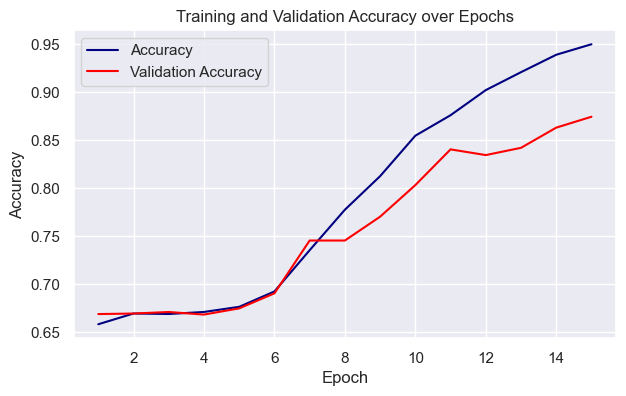

In [16]:
sns.set(rc={'figure.figsize':(7,4)})

# Extract the epoch numbers (assuming they are zero-indexed)
epochs = log_data['epoch'] + 1

# Plot the accuracy and validation accuracy
plt.plot(epochs, log_data['accuracy'], color='navy', label='Accuracy')
plt.plot(epochs, log_data['val_accuracy'], color='red', label='Validation Accuracy')

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

# Display the plot
plt.show()


Notre modèle montre une tendance claire à améliorer les performances à la fois par les ensembles du training et de validation. Avec une précision de validation atteignant jusqu'à 96,67% et la stabilisation des pertes de validation, le modèle apprend efficacement. Le processus d'entraînement semble être bien géré, sans signes significatifs de surajustement, ce qui indique un modèle robuste.

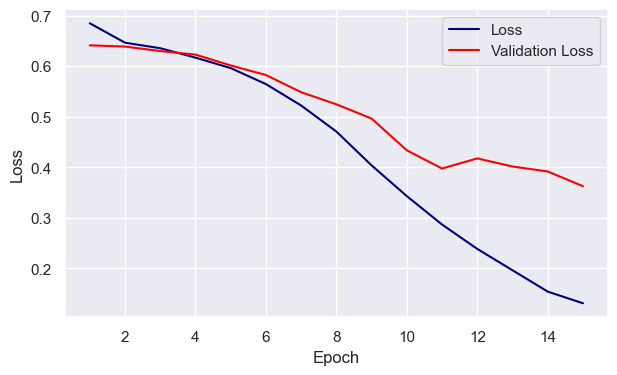

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size using Seaborn
sns.set(rc={'figure.figsize':(7,4)})


plt.plot(np.arange(1, len(log_data['loss']) + 1), log_data['loss'], color='navy', label='Loss')
plt.plot(np.arange(1, len(log_data['val_loss']) + 1), log_data['val_loss'], color='red', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Le graphique indique que le modèle apprend et améliore efficacement ses performances sur les époques initiales. Toutefois, un léger sur-apprentissage commence à se produire vers la fin de la période du training.

In [7]:
from keras.models import load_model

restored_model = load_model(r"C:\Users\User\Desktop\Nouveau dossier\PFA_final\first_model.h5")

In [8]:
steps = test.n//test.batch_size

val.reset()
X_test, y_test = [] , []
for i in range(steps):
    a , b = val.next()
    X_test.extend(a) 
    y_test.extend(b)

À la fin de cette boucle, X_test contient toutes les images de test et y_test contient toutes les étiquettes correspondantes.

In [10]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [11]:
pickle.dump(X_test, open(r'C:\Users\User\Desktop\Nouveau dossier\PFA_final\X_test.pkl', 'wb'))
pickle.dump(y_test, open(r'C:\Users\User\Desktop\Nouveau dossier\PFA_final\y_test.pkl', 'wb'))

ces lignes de code sauvegardent les données de test dans des fichiers pickle, ce qui permet de les recharger plus tard pour l'évaluation du modèle sans avoir à réexécuter le processus de prétraitement des données.

In [12]:
X_test = pickle.load(open(r'C:\Users\User\Desktop\Nouveau dossier\PFA_final\X_test.pkl', 'rb'))
y_test = pickle.load(open(r'C:\Users\User\Desktop\Nouveau dossier\PFA_final\y_test.pkl', 'rb'))

In [9]:
print(X_test.shape, y_test.shape)

(1856, 224, 224, 3) (1856,)


In [11]:
import json

score = restored_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


Test loss: 0.43328753113746643 / Test accuracy: 0.8674569129943848


Le résultat affiché montre que la perte de test est d'environ 0.4277 et la précision de test est d'environ 0.8675. Cela signifie que le modèle restauré atteint une précision d'environ 86.75% sur les données de test.

In [13]:
y_pred_prob = restored_model.predict(X_test)

58/58 [==============================] - 57s 975ms/step


In [11]:
y_pred_prob

array([[0.74865836],
       [0.07608043],
       [0.99692506],
       ...,
       [0.7116972 ],
       [0.00369739],
       [0.9909628 ]], dtype=float32)

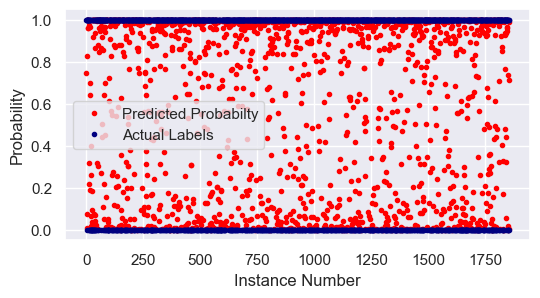

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
plt.plot(y_pred_prob,'.',color='red',label='Predicted Probabilty')
plt.plot(y_test,'.',color='navy',label='Actual Labels')
plt.xlabel('Instance Number')
plt.ylabel('Probability')
plt.legend()

Le nuage de points rouges, représentant les probabilités prédites, est réparti de manière dense entre 0 et 1. Cette distribution montre que le modèle attribue des probabilités variées pour chaque instance, suggérant une incertitude ou une variabilité dans ses prédictions, plutôt que des prédictions binaires claires.

In [16]:
y_test

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [12]:
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1,0)
y_pred.squeeze()

array([1, 0, 1, ..., 1, 0, 1])

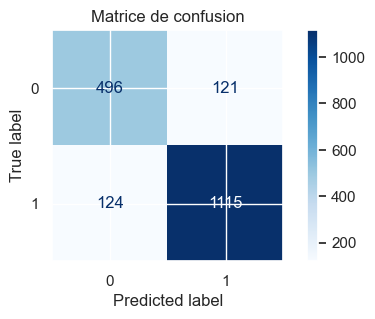

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convertir les prédictions en classes binaires
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1, 0)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()


In [18]:
print(classification_report(y_test, y_pred, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.79      0.81      0.80       610
Malignant (Class 1)       0.90      0.90      0.90      1246

           accuracy                           0.87      1856
          macro avg       0.85      0.85      0.85      1856
       weighted avg       0.87      0.87      0.87      1856



In [23]:
from sklearn.metrics import roc_curve, auc

fpr , tpr , thresholds = roc_curve (y_test , y_pred_prob)

area_under_curve = auc(fpr, tpr)

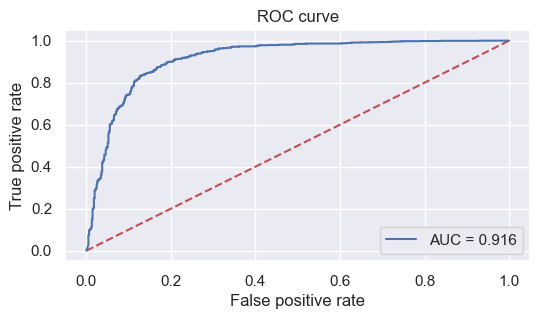

In [24]:
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Ligne rouge en pointillés représente une performance aléatoire (AUC = 0.5). Plus la courbe de notre modèle s'éloigne de cette ligne, meilleure est la performance.Le graphique ROC montre que notre modèle a une excellente performance pour la classification des étiquettes "Malignant" et "Benign". L'AUC de 0.916 indique une forte capacité de discrimination, ce qui est un bon indicateur de la qualité de votre modèle.

In [19]:
cancer_labels = ['Benign','Malignant']

img_indices = np.random.randint(0, len(X_test), size=[25])
sample_test_images = X_test[img_indices]
sample_test_labels = [cancer_labels[i] for i in y_pred[img_indices].squeeze()]

max_prediction = np.argmax(y_pred_prob, axis=1)
prediction_probs = np.max(y_pred_prob, axis=1)

Sélectionner un échantillon aléatoire de 25 images de test et leurs étiquettes prédites correspondantes, ainsi que les indices et les probabilités des classes prédites.

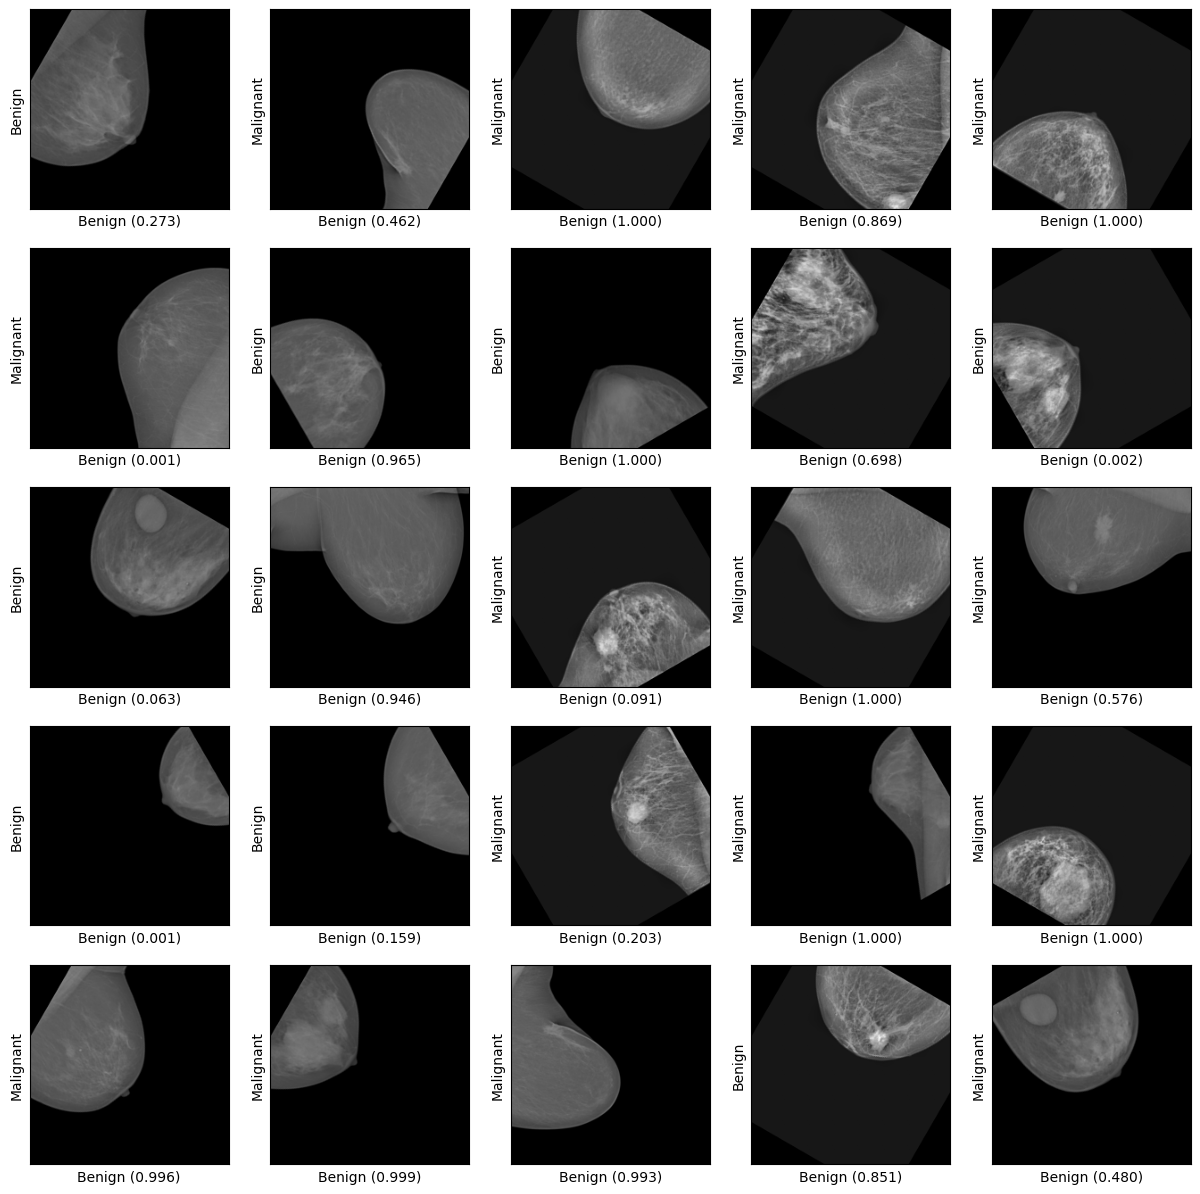

In [22]:
plt.figure(figsize=(15,15))
for i, (img, prediction, prob, true_label) in enumerate(
    zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.imshow(img)
  plt.xlabel('{} ({:0.3f})'.format(cancer_labels[prediction], prob))
  plt.ylabel('{}'.format(true_label))

Predicted probability: 0.9999698996543884


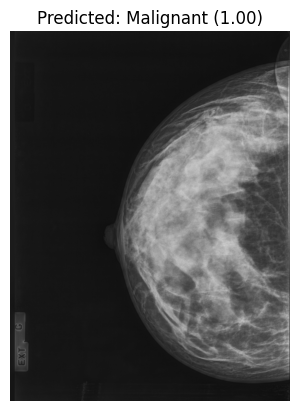

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import load_model

# Function to preprocess the image
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale as in the training
    return img_array

# Load the model
model = load_model(r"C:\Users\User\Desktop\Nouveau dossier\PFA_final\first_model.h5")

# Path to the image to be predicted
img_path = r"C:\Users\User\Desktop\PFA\Image de test\1.png"

img_array = preprocess_image(img_path, target_size=(224, 224))

# Make prediction (tf.function will be retraced only once)
@tf.function
def predict_image(model, img_array):
    return model(img_array, training=False)

# Call the prediction function
prediction = predict_image(model, img_array)
predicted_prob = prediction.numpy()[0][0]
print(f"Predicted probability: {predicted_prob}")

# Display the image and prediction
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {'Malignant' if predicted_prob > 0.5 else 'Benign'} ({predicted_prob:.2f})")
plt.axis('off')
plt.show()